In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')
library('tidymodels')

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflow

In [2]:
ihc_metrics <-
    read_tsv('ihc_metrics.tsv') %>%
    pivot_longer(
        names_to='metric',
        values_to='estimate',
        -c(`sample`, `Region`)
    )

ihc_metrics

Rows: 22 Columns: 14
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): sample, Region
dbl (12): CD3+ cells/mm^2, CD4+ cells/mm^2, CD8 + cells/mm^2, CD20 + cells/m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sample,Region,metric,estimate
<chr>,<chr>,<chr>,<dbl>
NMS22-13453,Peritumor,CD3+ cells/mm^2,952.997759
NMS22-13453,Peritumor,CD4+ cells/mm^2,313.827000
NMS22-13453,Peritumor,CD8 + cells/mm^2,712.247908
NMS22-13453,Peritumor,CD20 + cells/mm^2,123.254960
NMS22-13453,Peritumor,MECA-79 + cells/mm^2,184.626875
NMS22-13453,Peritumor,CD56 + cells/mm^2,14.544143
NMS22-13453,Peritumor,FOXP-3 + cells/mm^2,221.105703
NMS22-13453,Peritumor,CD68 + cells/mm^2,589.670300
NMS22-13453,Peritumor,CD45 + cells/mm^2,274.825424


In [3]:
q3_norm_tbl_wide <-
    read_xlsx('Chondrosarcoma Nanostring 12082023.xlsx', sheet='Chondrosarcoma Nanostring') %>%
    filter(!is.na(`Probe Name`)) %>%
    mutate(across(starts_with('2023'), parse_double))

q3_norm_tbl_wide %>%
    head()

Probe Name,Annotation,Accession #,NS Probe ID,Class Name,Analyte Type,Species Name,Target Sequence,% Samples above Threshold,Comments,⋯,20231011_30102816220624-01_NMS23-1947_11.RCC,20231011_30102816220624-01_NMS23-471_10.RCC,20231011_30102816220624-01_S08-25548_01.RCC,20231011_30102816220624-01_S10-479_02.RCC,20231011_30102816220624-01_S14-11208_04.RCC,20231011_30102816220624-01_S14-9996_03.RCC,20231011_30102816220624-01_S15-16380_05.RCC,20231011_30102816220624-01_S17-4703_06.RCC,20231011_30102816220624-01_S18-6943_07.RCC,20231011_30102816220624-01_Standard_12.RCC
<chr>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NA,NM_000014.4,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,20964.50,10562.54,9032.59,12600.21,2929.25,7203.07,13218.09,15516.11,10711.54,1529.53
ACVR1C,NA,NM_145259.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,48.90,33.14,26.67,124.59,26.86,25.87,96.15,19.46,171.47,1175.21
ADAM12,NA,NM_003474.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,1505.33,1179.69,622.95,1203.00,1298.10,1078.38,990.61,367.95,736.13
ADGRE1,NA,NM_001256252.1,NA,Endogenous,mRNA,NA,NA,91.67,NA,⋯,29.34,7.21,23.04,191.04,8.18,32.92,9.83,20.39,25.01,900.30
ADM,NA,NM_001124.2,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,581.87,123.08,1876.84,1254.21,148.33,670.22,274.24,109.35,317.93,377.99
ADORA2A,NA,NM_000675.5,NA,Endogenous,mRNA,NA,NA,100.00,NA,⋯,61.12,69.43,95.78,215.96,45.55,61.14,54.63,56.53,87.52,766.67


In [4]:
q3_norm_tbl <-
    q3_norm_tbl_wide %>%
    pivot_longer(
        names_to='sample',
        values_to='norm_exp',
        starts_with('2023')
    ) %>%
    mutate(
        `sample`=
            `sample` %>%
            str_replace_all('20231011_30102816220624-01_', '') %>%
            str_replace_all('\\.RCC', '')
    ) %>%
    select(`gene_symbol`=`Probe Name`, `sample`, `norm_exp`) %>%
    filter(`sample` != 'Standard_12') %>%
    mutate(`sample`=str_replace_all(`sample`, '_.*', ''))
    

q3_norm_tbl %>%
    head()

gene_symbol,sample,norm_exp
<chr>,<chr>,<dbl>
A2M,NMS22-13453,18994.71
A2M,NMS22-28934,32437.30
A2M,NMS23-1947,20964.50
A2M,NMS23-471,10562.54
A2M,S08-25548,9032.59
A2M,S10-479,12600.21


In [25]:
q3_norm_tbl %>%
    write_csv('q3_normalized_exp-long_tbl.csv')

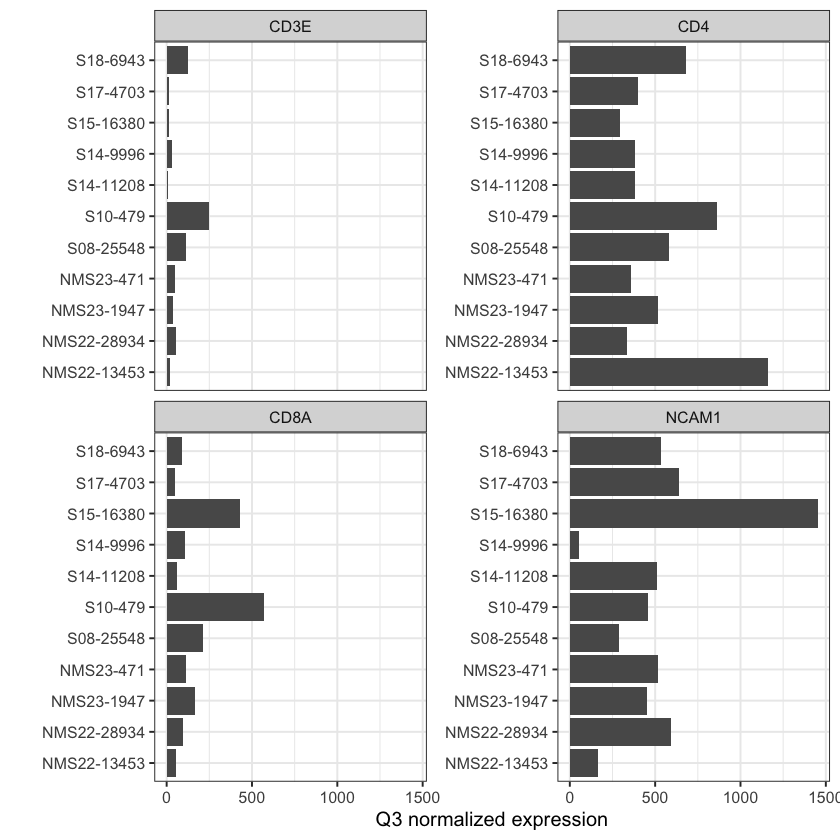

In [5]:
q3_norm_tbl %>%
    filter(`gene_symbol` %in% c('CD3E', 'CD8A', 'CD4', 'NCAM1')) %>%
    ggplot(aes(y=`sample`, x=`norm_exp`)) +
        geom_col() +
        facet_wrap(~`gene_symbol`, scales='free_y') +
        theme_bw(base_size=12) +
        labs(
            x='Q3 normalized expression',
            y=''
        )

In [6]:
c(
    ihc_metrics %>%
        distinct(`sample`) %>%
        pull(),
    q3_norm_tbl %>%
        distinct(`sample`) %>%
        pull()
) %>%
    table()

.
NMS22-13453 NMS22-28934  NMS23-1947   NMS23-471   S08-25548     S10-479 
          2           2           2           2           2           2 
  S14-11208    S14-9996   S15-16380    S17-4703    S18-6943 
          2           2           2           2           2 

In [7]:
correlate_with_gene <-
    function(ihc_variable, region_variable, gene_variable)  {        
        ihc_vector <-
            ihc_metrics %>%
            filter(
                `Region` == region_variable,
                `metric` == ihc_variable
            ) %>%
            select(`sample`, `estimate`)
        
        gene_vector <-
            q3_norm_tbl %>%
            filter(`gene_symbol` == gene_variable)
        
        cor.test(gene_vector$`norm_exp`, ihc_vector$`estimate`, method='pearson', na.rm=TRUE) %>%
            tidy() %>%
            mutate(
                `ihc_metric`=ihc_variable,
                `ihc_region`=region_variable,
                `gene_symbol`=gene_variable
            )
    }

correlate_with_gene('CD4+ cells/mm^2', 'Peritumor', 'CD4')

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.6707124,2.392472,0.04799413,7,0.01188448,0.9234828,Pearson's product-moment correlation,two.sided,CD4+ cells/mm^2,Peritumor,CD4


Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_label_repel()`).”


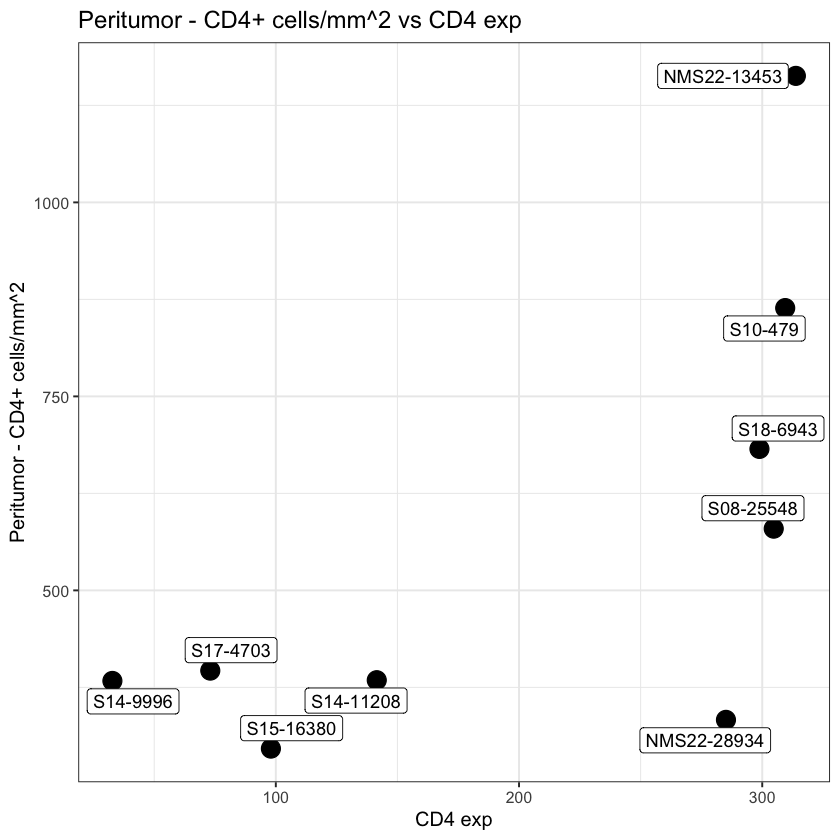

In [8]:
plot_correlation_with_gene <-
    function(ihc_variable, region_variable, gene_variable)  {        
        ihc_vector <-
            ihc_metrics %>%
            filter(
                `Region` == region_variable,
                `metric` == ihc_variable
            ) %>%
            select(`sample`, `estimate`)
        
        gene_vector <-
            q3_norm_tbl %>%
            filter(`gene_symbol` == gene_variable)
        
        ihc_vector %>%
            left_join(gene_vector, by='sample') %>%
            ggplot(aes(x=`estimate`, y=`norm_exp`)) +
                geom_point(size=5) +
                geom_label_repel(aes(label=`sample`)) +
                labs(
                    title=paste(region_variable, ' - ', ihc_variable, ' vs ', gene_variable, ' exp', sep=''),
                    x=paste(gene_variable, ' exp', sep=''),
                    y=paste(region_variable, ' - ', ihc_variable, sep=''),
                ) +
                theme_bw(base_size=12)
    }

plot_correlation_with_gene('CD4+ cells/mm^2', 'Peritumor', 'CD4')

In [9]:
system.time({
    
cor_tbl <-
    ihc_metrics %>%
    distinct(`Region`) %>%
    pull() %>%
    map_df(function(region_variable) {
        ihc_metrics %>%
            distinct(`metric`) %>%
            pull() %>%
            map_df(function(ihc_variable) {
                q3_norm_tbl %>%
                    distinct(`gene_symbol`) %>%
                    pull() %>%
                    map_df(~correlate_with_gene(ihc_variable=ihc_variable, region_variable=region_variable, .))
            })
    })
    
})

   user  system elapsed 
229.099   0.936 232.097 

In [10]:
cor_tbl %>%
    mutate(`p_corrected`=p.adjust(`p.value`, method='fdr')) %>%
    arrange(`p.value`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol,p_corrected
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0.9590686,10.160559,3.133443e-06,9,0.8458007,0.9896036,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CXCL3,0.05895887
0.9456951,8.728019,1.096662e-05,9,0.7992125,0.9861362,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CCL7,0.05955646
0.9427410,8.479776,1.385860e-05,9,0.7891533,0.9853655,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,SAMSN1,0.05955646
0.9418561,8.409015,1.482962e-05,9,0.7861560,0.9851343,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CXCL8,0.05955646
0.9558019,9.194930,1.582602e-05,8,0.8191208,0.9897803,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD48,0.05955646
0.9360839,7.983052,2.251296e-05,9,0.7667834,0.9836222,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Tumor,IL1A,0.07060064
0.9455382,8.215961,3.603089e-05,8,0.7806767,0.9873561,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,POLD1,0.09685104
0.9240118,7.249730,4.817676e-05,9,0.7272395,0.9804382,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,AQP9,0.11331175
0.9369405,7.582698,6.408111e-05,8,0.7494051,0.9853102,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,ANGPTL4,0.13397225


In [11]:
cor_tbl %>%
    arrange(`p.value`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9590686,10.160559,3.133443e-06,9,0.8458007,0.9896036,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CXCL3
0.9456951,8.728019,1.096662e-05,9,0.7992125,0.9861362,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CCL7
0.9427410,8.479776,1.385860e-05,9,0.7891533,0.9853655,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,SAMSN1
0.9418561,8.409015,1.482962e-05,9,0.7861560,0.9851343,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,CXCL8
0.9558019,9.194930,1.582602e-05,8,0.8191208,0.9897803,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD48
0.9360839,7.983052,2.251296e-05,9,0.7667834,0.9836222,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Tumor,IL1A
0.9455382,8.215961,3.603089e-05,8,0.7806767,0.9873561,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,POLD1
0.9240118,7.249730,4.817676e-05,9,0.7272395,0.9804382,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Peritumor,AQP9
0.9369405,7.582698,6.408111e-05,8,0.7494051,0.9853102,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,ANGPTL4


In [12]:
cor_tbl %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.9994385,42.182464,0.0005615264,2,0.9720880,0.9999889,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,AXIN1
0.9985168,25.936623,0.0014832218,2,0.9278919,0.9999705,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,MAGEA3/A6
0.9981653,23.314028,0.0018347161,2,0.9115445,0.9999636,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,LAG3
0.9978589,21.576861,0.0021410507,2,0.8975172,0.9999575,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,AXL
0.9977290,20.948581,0.0022709596,2,0.8916293,0.9999549,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,BATF3
0.9976442,20.566689,0.0023557785,2,0.8878043,0.9999532,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,BAD
0.9973860,19.520815,0.0026139585,2,0.8762539,0.9999481,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,OTOA
0.9972755,19.119151,0.0027244894,2,0.8713513,0.9999459,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,TNFSF9
0.9971123,18.568805,0.0028876713,2,0.8641589,0.9999426,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,NFKB2


In [23]:
cor_tbl %>%
    arrange(`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
-0.9991934,-35.188173,0.000806642,2,-0.9999840,-0.96014190,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,NCAM1
-0.9934861,-12.329599,0.006513921,2,-0.9998703,-0.71721463,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,SOCS1
-0.9846111,-7.967784,0.015388947,2,-0.9996923,-0.43803801,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,ERCC3
-0.9804691,-7.050237,0.019530903,2,-0.9996087,-0.33600436,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,RNLS
-0.9730144,-5.963529,0.026985569,2,-0.9994574,-0.18392665,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,RAD50
-0.9683929,-5.490581,0.031607107,2,-0.9993630,-0.10543801,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,COL17A1
-0.9622830,-5.002284,0.037717016,2,-0.9992375,-0.01591093,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,TLR3
-0.9622739,-5.001642,0.037726149,2,-0.9992373,-0.01578757,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,TP53
-0.9590203,-4.786732,0.040979663,2,-0.9991702,0.02639591,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,DEFB134


Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_label_repel()`).”


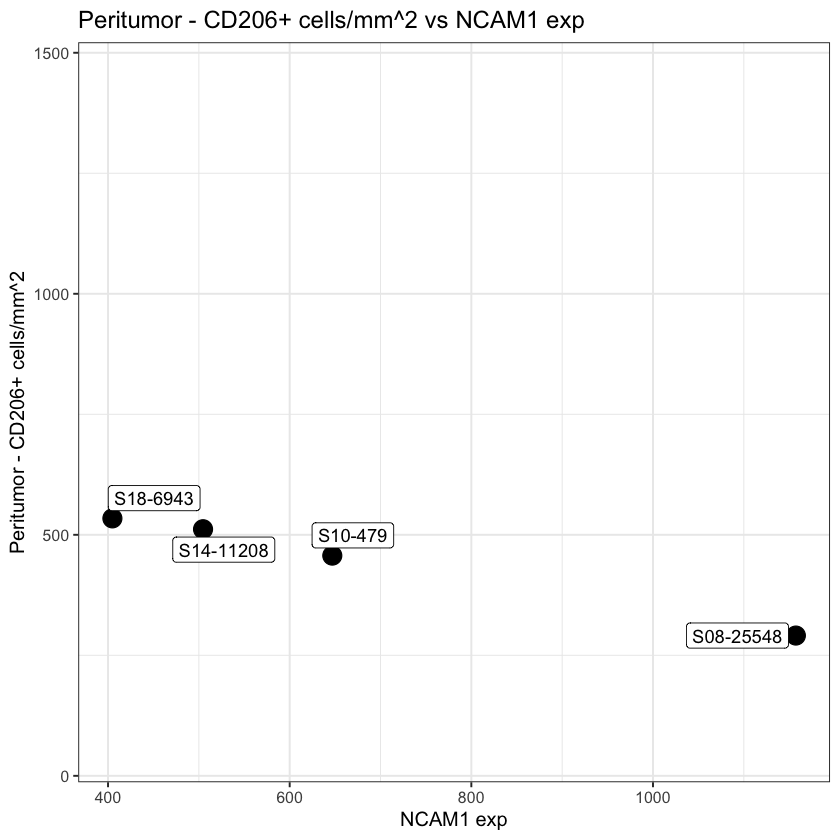

In [24]:
plot_correlation_with_gene('CD206+ cells/mm^2', 'Peritumor', 'NCAM1')

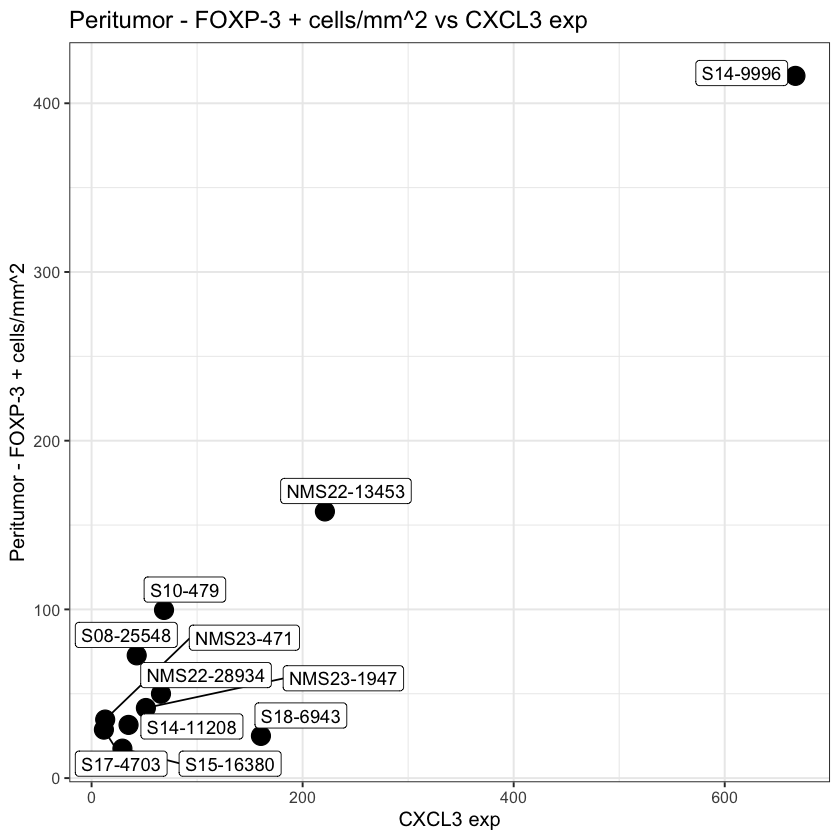

In [13]:
plot_correlation_with_gene('FOXP-3 + cells/mm^2', 'Peritumor', 'CXCL3')

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_label_repel()`).”


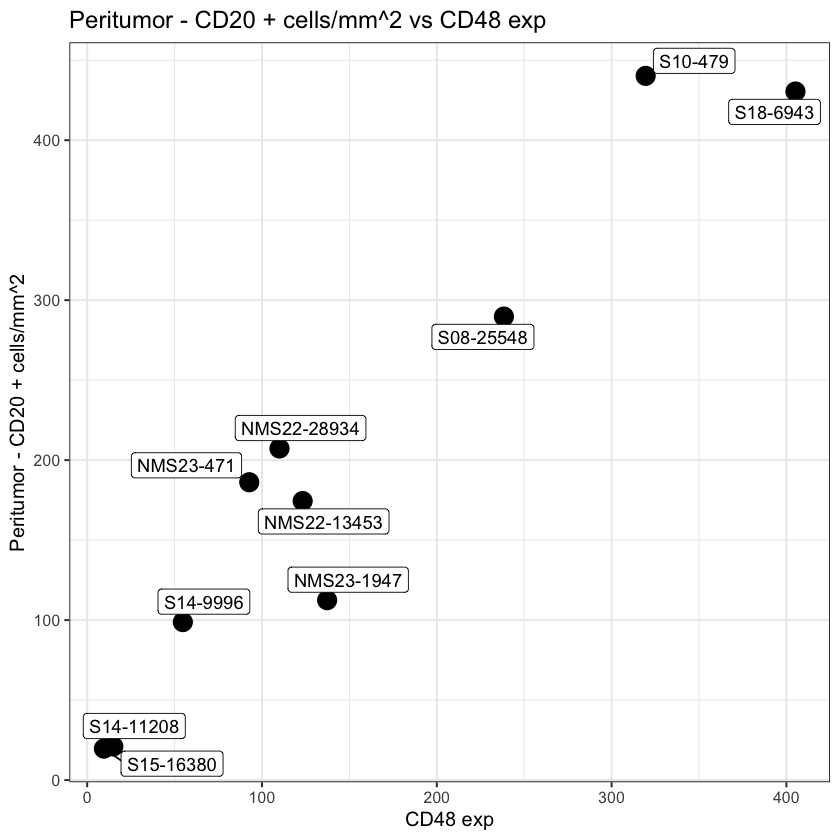

In [14]:
plot_correlation_with_gene('CD20 + cells/mm^2', 'Peritumor', 'CD48')

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_label_repel()`).”


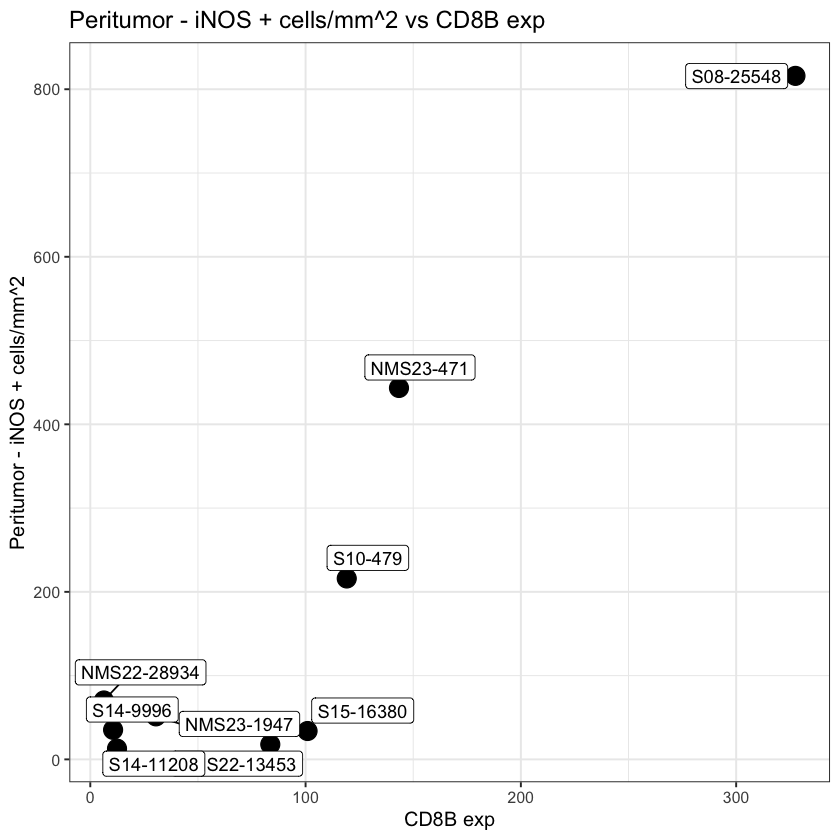

In [15]:
plot_correlation_with_gene('iNOS + cells/mm^2', 'Peritumor', 'CD8B')

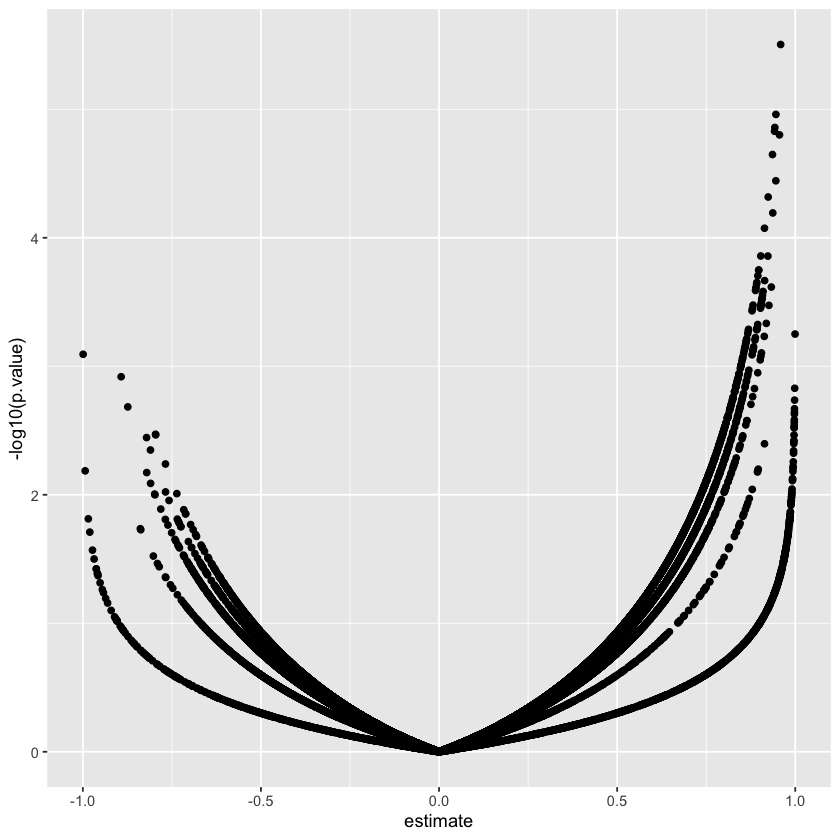

In [16]:
cor_tbl %>%
    ggplot(aes(x=`estimate`, y=-log10(`p.value`))) +
        geom_point() +
        xlim(-1, 1)

In [17]:
cor_tbl %>%
    filter(`gene_symbol` == 'CD8A') %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.98380141,7.76130528,0.01619859,2,0.41692073,0.9996760,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Tumor,CD8A
0.53337524,1.89167267,0.09109249,9,-0.09778782,0.8585499,Pearson's product-moment correlation,two.sided,CD45 + cells/mm^2,Peritumor,CD8A
0.45033153,1.51310669,0.16454660,9,-0.20489412,0.8268414,Pearson's product-moment correlation,two.sided,FOXP-3 + cells/mm^2,Tumor,CD8A
0.44040172,1.38743931,0.20273198,8,-0.26182589,0.8377340,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Tumor,CD8A
0.43829473,1.46288203,0.17752612,9,-0.21921737,0.8220379,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,CD8A
0.38869558,1.19322489,0.26696476,8,-0.31900071,0.8181047,Pearson's product-moment correlation,two.sided,MECA-79 + cells/mm^2,Tumor,CD8A
0.28624409,0.79040376,0.45523078,7,-0.46657371,0.7985590,Pearson's product-moment correlation,two.sided,iNOS + cells/mm^2,Peritumor,CD8A
0.21998238,0.63782846,0.54140710,8,-0.47550448,0.7462483,Pearson's product-moment correlation,two.sided,CD20 + cells/mm^2,Peritumor,CD8A
0.21175185,0.30641068,0.78824815,2,-0.94079911,0.9745137,Pearson's product-moment correlation,two.sided,CD206+ cells/mm^2,Peritumor,CD8A


In [18]:
cor_tbl %>%
    filter(`ihc_metric` == 'CD8 + cells/mm^2') %>%
    arrange(-`estimate`) %>%
    head(30)

estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.8570077,4.989336,0.0007498081,9,0.52918574,0.9622119,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEC1
0.8421890,4.685921,0.0011426195,9,0.48972900,0.9580496,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEB2
0.8299580,4.463532,0.0015692361,9,0.45821493,0.9545768,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEC2
0.8222986,4.335065,0.0018910499,9,0.43894460,0.9523847,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,IGF2R
0.8097443,4.139918,0.0025219459,9,0.40810390,0.9487624,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,DPP4
0.8056942,4.080623,0.0027554410,9,0.39834614,0.9475859,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,MAGEA3/A6
0.8053873,4.076198,0.0027737649,9,0.39761053,0.9474966,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Peritumor,CDH5
0.7966479,3.953956,0.0033346619,9,0.37687948,0.9449443,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,ULBP2
0.7869445,3.826163,0.0040514667,9,0.35434419,0.9420891,Pearson's product-moment correlation,two.sided,CD8 + cells/mm^2,Tumor,VEGFA


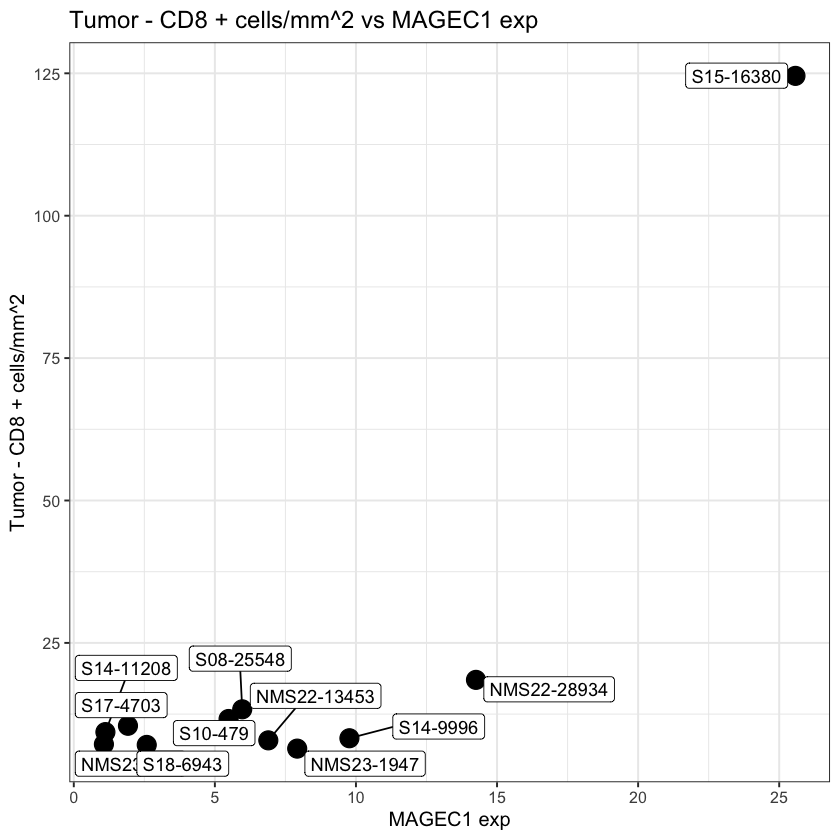

In [19]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Tumor', 'MAGEC1')

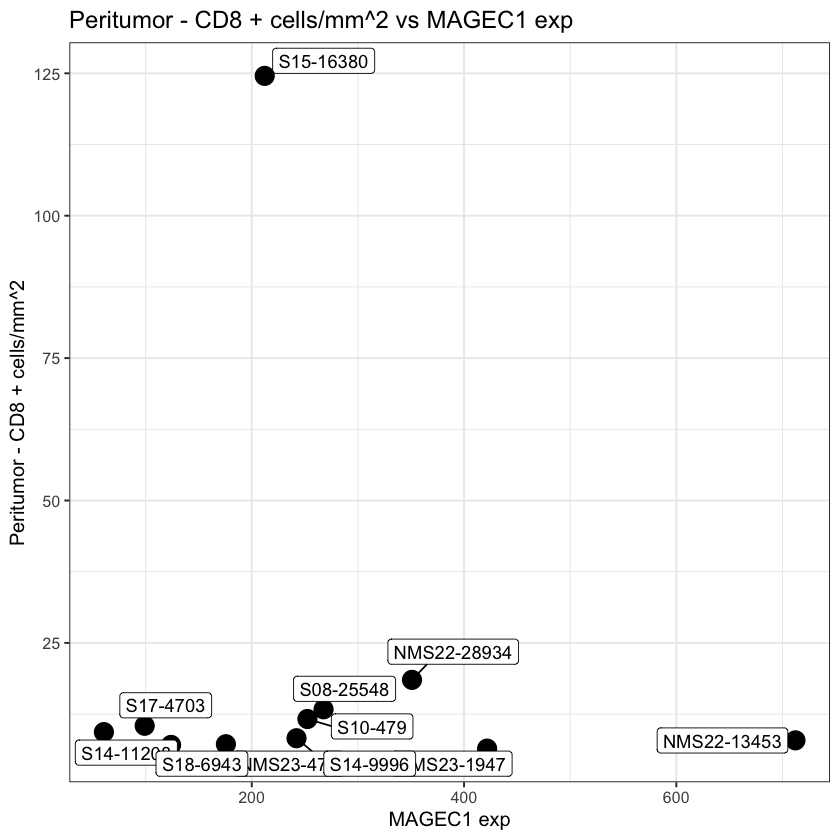

In [20]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Peritumor', 'MAGEC1')

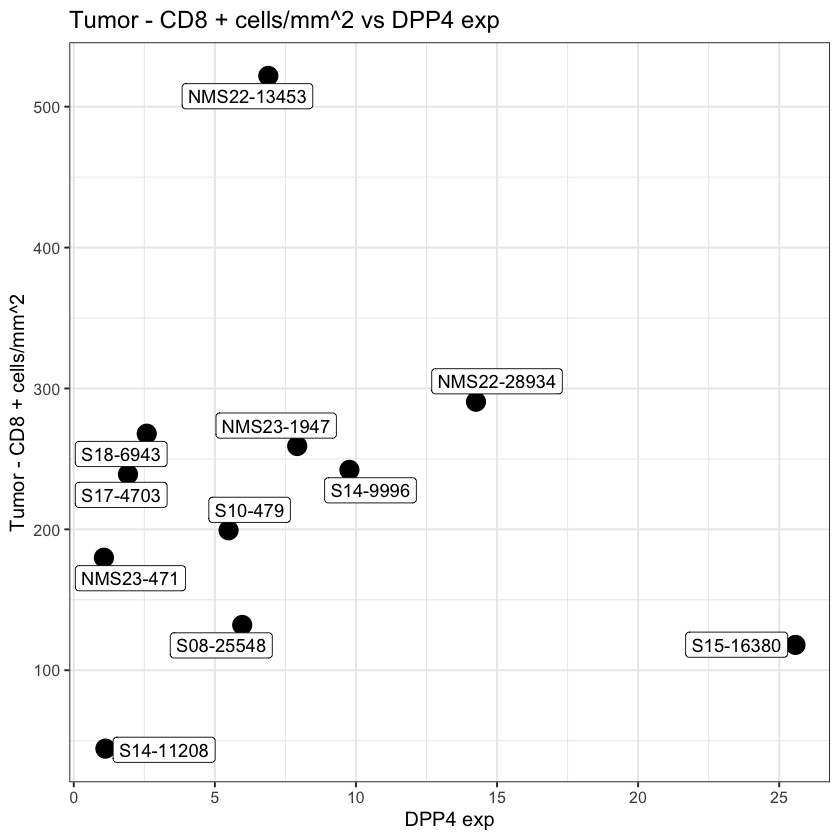

In [21]:
plot_correlation_with_gene('CD8 + cells/mm^2', 'Tumor', 'DPP4')

In [22]:
cor_tbl %>%
    write_csv('ihc-vs-exp_linear-correlations.csv')